In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
data = pd.read_csv('../reports/run_without_ngrams_modified_pre_basic/classification_report_2.csv')

In [3]:
# rename first column
data.rename(columns={'Unnamed: 0': 'type'}, inplace=True)

In [4]:
# remove all where type not "weighted avg"
data = data[data['type'] == 'weighted avg']
# remove column type, precision, recall, support, pipeline
data = data.drop(columns=['type', 'precision', 'recall', 'support', 'pipeline'])
# rename preprocess_function_uses_lemmatization in use_lemma
data.rename(columns={'preprocess_function_uses_lemmatization': 'use_lemma'}, inplace=True)
# rename preprocess_function_uses_stemmanization in use_stem
data.rename(columns={'preprocess_function_uses_stemmanization': 'use_stem'}, inplace=True)

In [7]:
data

,f1-score,classifier,vectorizer,features,preprocess_function,use_lemma,use_stem,feature_list
9,0.852091,MultinomialNB,TfidfVectorizer(),CombinedFeatures,preprocess_advanced,False,False,"[""uppercase_amount"", ""comment_length""]"
49,0.852091,MultinomialNB,TfidfVectorizer(),CombinedFeatures,preprocess_advanced,False,False,"[""comment_length""]"
89,0.852091,MultinomialNB,TfidfVectorizer(),CombinedFeatures,preprocess_advanced,False,False,"[""uppercase_amount""]"
104,0.851266,MultinomialNB,CountVectorizer(),CombinedFeatures,preprocess_basic,False,False,"[""uppercase_amount""]"
64,0.851266,MultinomialNB,CountVectorizer(),CombinedFeatures,preprocess_basic,False,False,"[""comment_length""]"
24,0.851266,MultinomialNB,CountVectorizer(),CombinedFeatures,preprocess_basic,False,False,"[""uppercase_amount"", ""comment_length""]"
44,0.845912,MultinomialNB,CountVectorizer(),CombinedFeatures,preprocess_advanced,False,False,"[""comment_length""]"
4,0.845912,MultinomialNB,CountVectorizer(),CombinedFeatures,preprocess_advanced,False,False,"[""uppercase_amount"", ""comment_length""]"
84,0.845912,MultinomialNB,CountVectorizer(),CombinedFeatures,preprocess_advanced,False,False,"[""uppercase_amount""]"
19,0.837301,MultinomialNB,TfidfVectorizer(),CombinedFeatures,preprocess_advanced,True,True,"[""uppercase_amount"", ""comment_length""]"


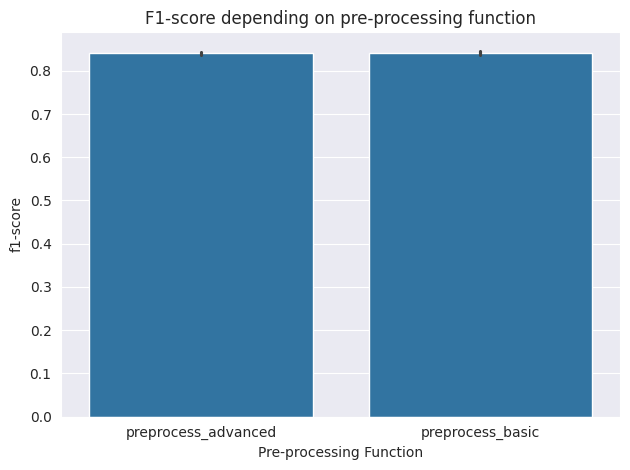

In [67]:
sns.barplot(x='preprocess_function', y='f1-score', data=data)
# set x-axis label to model
plt.xlabel("Pre-processing Function")
# set title
plt.title("F1-score depending on pre-processing function")
# fit tight
plt.tight_layout()
# save fig
plt.savefig('../reports/figures/01/f1_score_preprocessing_function.png')

([0, 1], [Text(0, 0, 'CountVectorizer()'), Text(1, 0, 'TfidfVectorizer()')])

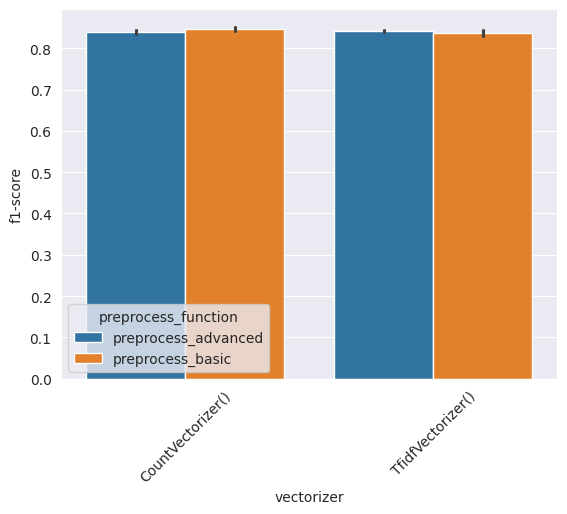

In [8]:
sns.barplot(x='vectorizer', y='f1-score', hue="preprocess_function", data=data)
# rotate x-axis labels
plt.xticks(rotation=45)



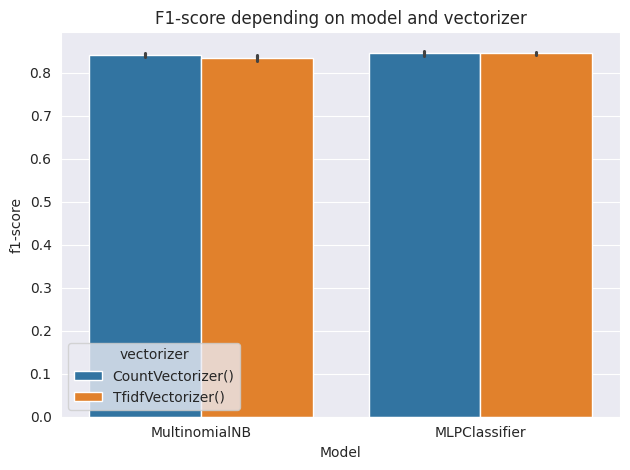

In [66]:
sns.barplot(x='classifier', y='f1-score', hue="vectorizer", data=data)
# set x-axis label to model
plt.xlabel("Model")
# set title
plt.title("F1-score depending on model and vectorizer")
# fit tight
plt.tight_layout()
# save fig
plt.savefig('../reports/figures/01/f1_score_model_vectorizer.png')

<Axes: xlabel='use_lemma', ylabel='f1-score'>

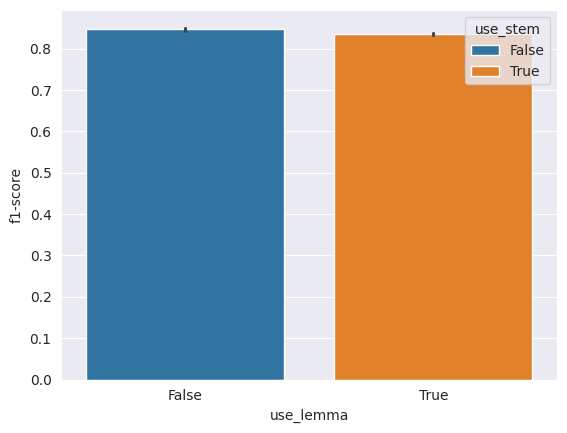

In [41]:
sns.barplot(x='use_lemma', y='f1-score', hue="use_stem", data=data)

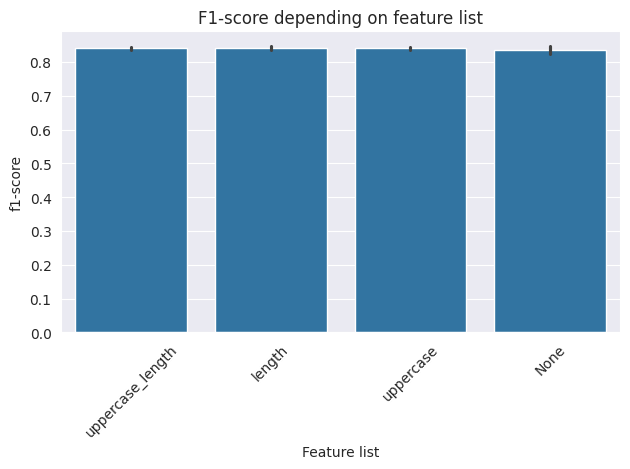

In [65]:
# load first report
data_report_1 = pd.read_csv('../reports/run_without_ngrams_modified_pre_basic/classification_report_1.csv')
# create new dataframe with columns f1-score, feature_list. data_report_1 does not have feature_list. Leave those columns empty.
data_report_1 = data_report_1[['f1-score']]
data_report_1['feature_list'] = "None"
# create new merged dataframe, re-index
data_merged = pd.concat([data[['f1-score', 'feature_list']], data_report_1], ignore_index=True)
# fill rows where feature_list = "["uppercase_amount"]" with "uppercase"
data_merged.loc[data_merged['feature_list'] == '["uppercase_amount"]', 'feature_list'] = 'uppercase'
# fill rows where feature_list = "["comment_length"]" with "length"
data_merged.loc[data_merged['feature_list'] == '["comment_length"]', 'feature_list'] = 'length'
# fill rows where feature_list = "["uppercase_amount", "comment_length"]" with "uppercase_length"
data_merged.loc[data_merged['feature_list'] == '["uppercase_amount", "comment_length"]', 'feature_list'] = 'uppercase_length'

sns.barplot(x='feature_list', y='f1-score', data=data_merged)
# rotate x-axis labels
plt.xticks(rotation=45)
# set title
plt.title("F1-score depending on feature list")
# fit tight
plt.tight_layout()
# set x-axis label
plt.xlabel("Feature list")
# save fig
plt.savefig('../reports/figures/01/f1_score_feature_list.png')


In [60]:
data_merged

,f1-score,feature_list
0,0.845912,"[""uppercase_amount"", ""comment_length""]"
1,0.852091,"[""uppercase_amount"", ""comment_length""]"
2,0.828967,"[""uppercase_amount"", ""comment_length""]"
3,0.837301,"[""uppercase_amount"", ""comment_length""]"
4,0.851266,"[""uppercase_amount"", ""comment_length""]"
...,...,...
83,0.776892,NaN
84,0.897996,NaN
85,0.860000,NaN
86,0.837444,NaN


In [24]:
data[["f1-score", "classifier", "vectorizer", "preprocess_function", "use_lemma", "use_stem"]].iloc[0,:].to_latex(index=False, formatters={"name": str.upper}, float_format="{:.2f}".format, escape=False)  

'\\begin{tabular}{l}\n\\toprule\n4 \\\\\n\\midrule\n0.845912 \\\\\nMultinomialNB \\\\\nCountVectorizer() \\\\\npreprocess_advanced \\\\\nFalse \\\\\nFalse \\\\\n\\bottomrule\n\\end{tabular}\n'